<a href="https://colab.research.google.com/github/shihchun/ML-homework/blob/master/perceptron_bassic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 單層感知機

[quadtree](https://github.com/fogleman/Quads)
希望達到分類情況如下：

[code from ](https://kknews.cc/zh-tw/news/6892rpl.html)

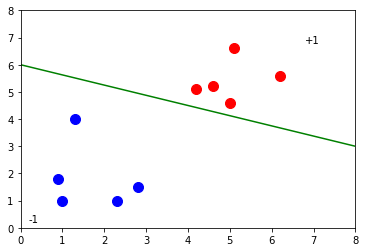

In [0]:
# 產生數據
import random
import numpy as np
import matplotlib.pyplot as plt

k = []; 
for _ in range(10):
  x = random.uniform(1, 4)
  y = random.uniform(1, 4)
  k.append( tuple( (x, y) ) )
  pass
x = k ; del  k;

x = [(1,1), (0.9,1.8), (2.3,1), (2.8,1.5), (1.3,4),(5,4.6), (4.2,5.1), (5.1, 6.6), (6.2,5.6), (4.6,5.2)]
y = [-1,-1,-1,-1,-1,1,1,1,1,1] # label 標記

mk = []; cs = [];

for _ in y:
  if _ > 0:
    mk.append('o')
    cs.append('red')
  else:
    mk.append('x')
    cs.append('blue')
    pass
  pass

x1, x2  = zip(*x) # 將元組(x,y)拆成[x1,x2,x3,,,], [y1,y2,y3,,,]

for _mk, _cs, _x1, _x2 in zip(mk, cs, x1, x2):
  plt.scatter(_x1, _x2,c = _cs, s = 100)
  pass
plt.text(6.8,6.8,r'+1')
plt.text(0.2,0.2,r'-1')
plt.axis([0,8,0,8]) # 顯示區間[0,8]

# 隨便畫一條線（要讓感知機找到可以分類的一條線）
plt.plot([0,8],[6,3], 'k-', color = 'g') 
plt.show()

# 開始疊代(分類)

其中特性： 單層感知機***不能處理xor的資料***


設定閥值 threshold，就是sign()符號函數

$$
a=\sum_{d=1}^{D} w_{d} x_{d}
$$

![](https://upload.wikimedia.org/wikipedia/commons/c/c0/Signum_function.png)

如果 $a > threshold$，則判定輸入為正例。如果 $a < threshold$，則判定輸入為負例。對於 $a == threshold$的情況，認為是特殊情況，不予考慮（raise 拋出）。

$$
\begin{aligned} h(\mathbf{x}) &=\operatorname{sign}\left(\left(\sum_{i=1}^{d} w_{i} x_{i}\right)-\text { threshold }\right) \\ &=\operatorname{sign}\left(\left(\sum_{i=1}^{d} w_{i} x_{i}\right)+\underbrace{(-\text { threshold })}_{w_{0}} \cdot \underbrace{(+1)}_{x_{0}}\right) \text { 跟label不相同時，加上前一個狀態 } \\ &=\operatorname{sign}\left(\sum_{i=0}^{d} w_{i} x_{i}\right) \\ &=\operatorname{sign}\left(\mathrm{w}^{T} \mathbf{x}\right) \end{aligned}
$$

然後

![](https://user-images.githubusercontent.com/29697421/35953622-735e0afe-0cc0-11e8-9c5f-85e1efb63241.png)

我們先取一個隨機向量$W$，與現有的數據$X[i]$做點乘（elementwize multiply），取得結果的符號。
如果符號符合我們的預期的話，則continue。否則就要對$W$進行修正。
修正的方式是$W += y \times X[i]$，每一次修正都是減少現有向量$W$與向量$y \times X[i]$的夾角，從而調整答案的正確性

iteration of 1 

 w1: 4 
 w2: 3.5999999999999996 
 b: 0 

iteration of 2 

 w1: 4.800000000000001 
 w2: 4.3999999999999995 
 b: -2 

iteration of 3 

 w1: 0.600000000000001 
 w2: 0.5999999999999994 
 b: -5 



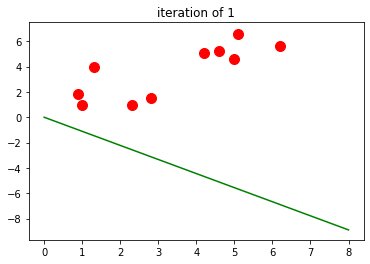

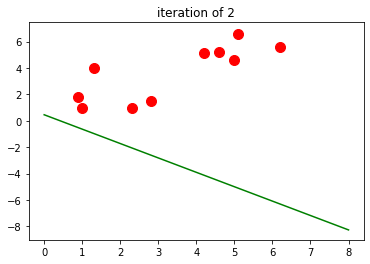

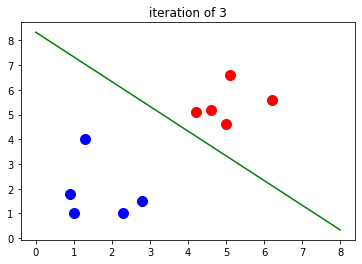

In [0]:
# 產生數據
import numpy as np
import matplotlib.pyplot as plt
import random

x = [(1,1), (0.9,1.8), (2.3,1), (2.8,1.5), (1.3,4),(5,4.6), (4.2,5.1), (5.1, 6.6), (6.2,5.6), (4.6,5.2)]
y = [-1,-1,-1,-1,-1,1,1,1,1,1] # label 標記

x1, x2  = zip(*x) # 將元組(x,y)拆成[x1,x2,x3,,,], [y1,y2,y3,,,]

mk =  [0,0,0,0,0,0,0,0,0,0]
cs =  [0,0,0,0,0,0,0,0,0,0]

w1, w2, b = 0, 0, 0 # w1-->x, w2-->y, b-->bias

for _ in range(3):
  for i in range(10): # 10個數據train data，帶入訓練出新的 w1 x方向, w2 y方向, b
    s = w1 * x1[i] + w2 * x2[i] +b
    if (s >= 0 and y[i] <= 0) or ( s <= 0 and y[i] > 0 ): # s>0如果不等於label，s<=0如果不等于label
      # 加上前一個狀態的 wt = y*x，為下一個狀態的 w權重
      w1 += y[i] * x1[i]
      w2 += y[i] * x2[i]
      b += y[i]

  for i in range(10): # >0 <0 sign(x) 符號函數來定義並分類
    s = w1* x1[i] + w2 * x2[i] + b # sign(w*x+b) 有x、y兩個軸
    if s > 0:
      cs[i] = 'red'
      mk[i] = 'x'
    if s < 0:
      cs[i] = 'blue'
      mk[i] = 'o'
  plt.figure()
  # zip(mk, cs, x1, x2) 包成，ans = [mk[i], cs[i], x1[i], x2[i]]
  for _mk, _cs, _x1, _x2 in zip(mk, cs, x1, x2): 
    plt.title("iteration of "+str(_+1))
    plt.scatter(_x1, _x2, c = _cs, s = 100)

  # 求x=0, x=8時，w1* x1[i] + w2 * x2[i] + b的解。x1 = x = 0,8
  s1 = (0, -b/w2) # x==0的點
  s2 = (8, (-b-8*w1)/w2 ) # x==8的點
  # 兩點畫線
  plt.plot( [ s1[0], s2[0] ], [ s1[1], s2[1] ], 'k-', color = 'g' )
  print("iteration of "+str(_+1), "\n")
  print(" w1: %s \n w2: %s \n b: %s \n" %(w1,w2,b) )

# 丟進隨機變數

訓練 100次

iteration of 100 

 w1: 14.266378220031605 
 w2: -4.336038955273545 
 b: 2 



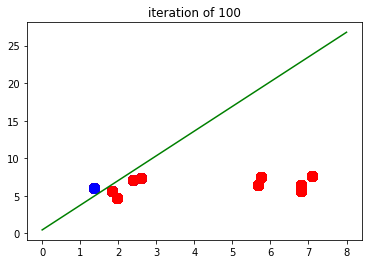

In [1]:
# 產生數據
import numpy as np
import matplotlib.pyplot as plt
import random

x = [(1,1), (0.9,1.8), (2.3,1), (2.8,1.5), (1.3,4),(5,4.6), (4.2,5.1), (5.1, 6.6), (6.2,5.6), (4.6,5.2)]
y = [-1,-1,-1,-1,-1,1,1,1,1,1] # label 標記

# 若輸入亂數
k = []
for _ in range(100):
  k1 = random.uniform(1,8)
  k2 = random.uniform(1,8)
  k.append( tuple((k1,k2)))
# print(x,'\n',k)
x=k
x1, x2  = zip(*x) # 將元組(x,y)拆成[x1,x2,x3,,,], [y1,y2,y3,,,]

mk =  [0,0,0,0,0,0,0,0,0,0]
cs =  [0,0,0,0,0,0,0,0,0,0]

w1, w2, b = 0, 0, 0 # w1-->x, w2-->y, b-->bias

for _ in range(100):
  for i in range(10): # 10個數據train data，帶入訓練出新的 w1 x方向, w2 y方向, b
    s = w1 * x1[i] + w2 * x2[i] +b
    if (s >= 0 and y[i] <= 0) or ( s <= 0 and y[i] > 0 ): # s>0如果不等於label，s<=0如果不等于label
      # 加上前一個狀態的 wt = y*x，為下一個狀態的 w權重
      w1 += y[i] * x1[i]
      w2 += y[i] * x2[i]
      b += y[i]

  for i in range(10): # >0 <0 sign(x) 符號函數來定義並分類
    s = w1* x1[i] + w2 * x2[i] + b # sign(w*x+b) 有x、y兩個軸
    if s > 0:
      cs[i] = 'red'
      mk[i] = 'x'
    if s < 0:
      cs[i] = 'blue'
      mk[i] = 'o'

  # zip(mk, cs, x1, x2) 包成，ans = [mk[i], cs[i], x1[i], x2[i]]
  for _mk, _cs, _x1, _x2 in zip(mk, cs, x1, x2): 
    plt.title("iteration of "+str(_+1))
    plt.scatter(_x1, _x2, c = _cs, s = 100)

  if _ ==99:
    # 求x=0, x=8時，w1* x1[i] + w2 * x2[i] + b的解。x1 = x = 0,8
    s1 = (0, -b/w2) # x==0的點
    s2 = (8, (-b-8*w1)/w2 ) # x==8的點
    # 兩點畫線
    plt.plot( [ s1[0], s2[0] ], [ s1[1], s2[1] ], 'k-', color = 'g' )
    print("iteration of "+str(_+1), "\n")
    print(" w1: %s \n w2: %s \n b: %s \n" %(w1,w2,b) )